In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Reading All files 
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
prior = pd.read_csv("order_products__prior.csv")
train = pd.read_csv("order_products__train.csv")

In [ ]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
prior.head()


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [ ]:
# merging the products and aisle dataframes on aisle_id col
pro_ais = products.merge(aisles,on='aisle_id', how='inner')


In [ ]:
#checking if they are any changes on the data after merging
print(products.shape)
print(aisles.shape)
print(pro_ais.shape)

(49688, 4)
(134, 2)
product_id       0
product_name     0
aisle_id         0
department_id    0
aisle            0
dtype: int64
(49688, 5)


In [ ]:
# merging the products and aisle dataframes on aisle_id col
depats = pro_ais.merge(departments,on='department_id', how='inner')
depats.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [ ]:
orders.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [ ]:
prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
prior_order = prior.merge(orders,on='order_id', how='inner')
prior_order.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [ ]:
data_frame = prior_order.merge(depats,on='product_id', how='inner')
data_frame.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
#copying a dataframe for use so that we wont make changes to the original data
df= data_frame.copy()
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
#Checking for null values
df.isna().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

# Days since prior order
### Has 2 078 068 null values
### Null values means the values where clients have never order before so it should be filled with 0

In [ ]:
#replacing null values in the col Days_since_prior Order with 0 days
df.days_since_prior_order.fillna(0, inplace=True )

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7684\4285621470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.days_since_prior_order.fillna(0, inplace=True )


In [ ]:
#Checking for null values if still any 
df.isna().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [ ]:
#checking the columns
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

# Columns To Delete
### -Eval_set as only the prior data has been used for the analysis so the col is not important 
### -The aisle_id as the aisle col will be used for analysis and visualization
###  -The department_id may also be useless in the future as they is a department column 

In [ ]:
# Deleting the cols  'product_id','eval_set', 'aisle_id', 'department_id'
df.drop(columns=[ 'product_id','eval_set', 'aisle_id', 'department_id'], inplace=True)

In [ ]:
df.head(20)

,order_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle,department
0,2,1,1,202279,3,5,9,8.0,Organic Egg Whites,eggs,dairy eggs
1,2,2,1,202279,3,5,9,8.0,Michigan Organic Kale,fresh vegetables,produce
2,2,3,0,202279,3,5,9,8.0,Garlic Powder,spices seasonings,pantry
3,2,4,1,202279,3,5,9,8.0,Coconut Butter,oils vinegars,pantry
4,2,5,0,202279,3,5,9,8.0,Natural Sweetener,baking ingredients,pantry
5,2,6,1,202279,3,5,9,8.0,Carrots,fresh vegetables,produce
6,2,7,1,202279,3,5,9,8.0,Original Unflavored Gelatine Mix,doughs gelatins bake mixes,pantry
7,2,8,1,202279,3,5,9,8.0,All Natural No Stir Creamy Almond Butter,spreads,pantry
8,2,9,0,202279,3,5,9,8.0,Classic Blend Cole Slaw,packaged vegetables fruits,produce
9,3,1,1,205970,16,5,17,12.0,Total 2% with Strawberry Lowfat Greek Strained...,yogurt,dairy eggs


In [ ]:
#new shape of the data
print(data_frame.shape)
print(df.shape)

(32434489, 15)
(32434489, 11)


# Comparison of the dataframes
### -rows still remain the same 
### -cols are now reduced by 3 in the df compared to the data_frames which we had in the beginning

In [ ]:
df.isna().sum()

order_id                  0
add_to_cart_order         0
reordered                 0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle                     0
department                0
dtype: int64

In [ ]:
df.columns

Index(['order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_name', 'aisle', 'department'],
      dtype='object')

In [ ]:
#checking the Data types of the data if they are in a correct order
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   add_to_cart_order       int64  
 2   reordered               int64  
 3   user_id                 int64  
 4   order_number            int64  
 5   order_dow               int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
 8   product_name            object 
 9   aisle                   object 
 10  department              object 
dtypes: float64(1), int64(7), object(3)
memory usage: 2.7+ GB


In [ ]:
#CHecking the order dow which is the Day Of Week 
df.order_dow.value_counts()

order_dow
0    6209666
1    5665856
6    4500304
2    4217798
5    4209533
3    3844117
4    3787215
Name: count, dtype: int64

# Words Day of week
### Creating a new col with the the dow as string 1 as Monday adn 6 as sat


In [ ]:
#making  new col with actual dates as words
day_map = {1: 'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat', 0:'Sun'}
df['Day']= df['order_dow'].map(day_map)

In [ ]:
Day_ofweek=df['Day'].value_counts()
Day_ofweek

Day
Sun     6209666
Mon     5665856
Sat     4500304
Tue     4217798
Fri     4209533
Wed     3844117
Thur    3787215
Name: count, dtype: int64

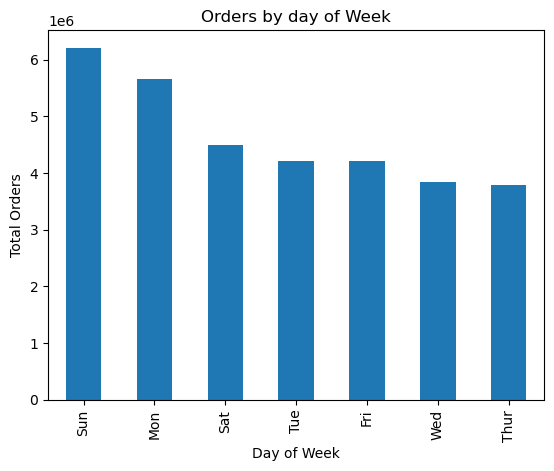

In [ ]:
Day_ofweek.plot(kind='bar')
plt.title("Orders by day of Week")
plt.xlabel("Day of Week")
plt.ylabel('Total Orders')
plt.show()

# Bar Chart for Orders By Day of Week 
### -The graph shows that most orders are done on Sunday and Monday 
### - This means that customers tend to do their shopping during the week Mostly Sunday but sales are reduced during the week esp on Wed and Thursday 

In [ ]:
df.columns

Index(['order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_name', 'aisle', 'department', 'Day'],
      dtype='object')

In [ ]:
#showing the top 10 departments 
dep=df['department'].value_counts().sort_values(ascending=False).head(10)
dep

department
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
Name: count, dtype: int64

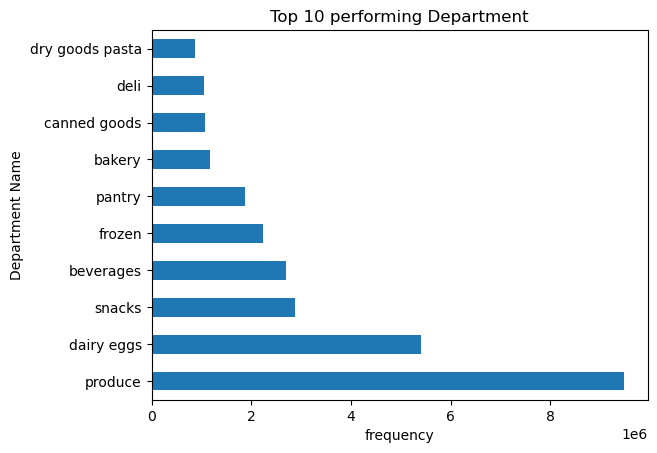

In [ ]:
dep.plot(kind='barh')
plt.title("Top 10 performing Department")
plt.ylabel('Department Name')
plt.xlabel('frequency')
plt.show()

# Departmets Col
### -The Produce is the leading data department which means that the company should focus on it by managing its inventory so that the compny maximises profits.

In [ ]:
df.columns

Index(['order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_name', 'aisle', 'department', 'Day'],
      dtype='object')

<Axes: xlabel='order_hour_of_day'>

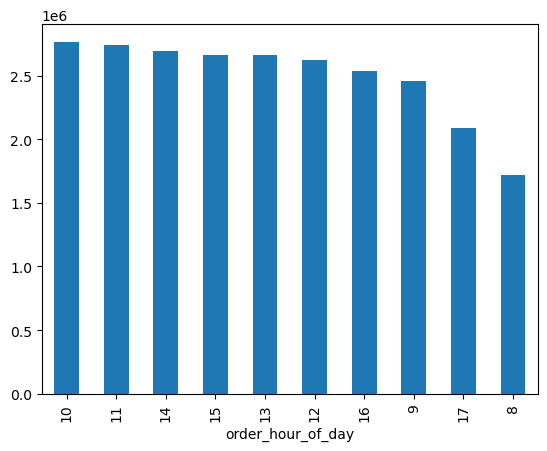

In [ ]:
df.order_hour_of_day.value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
df['order_hour'] = pd.to_datetime(df['order_hour_of_day'], unit='h').dt.time


In [ ]:
bins= [0,11,17,24]
labels=['Morning', 'Afternoon', 'Night']
df["order_hour_bins"]= pd.cut(df['order_hour_of_day'], bins=bins, labels=labels)


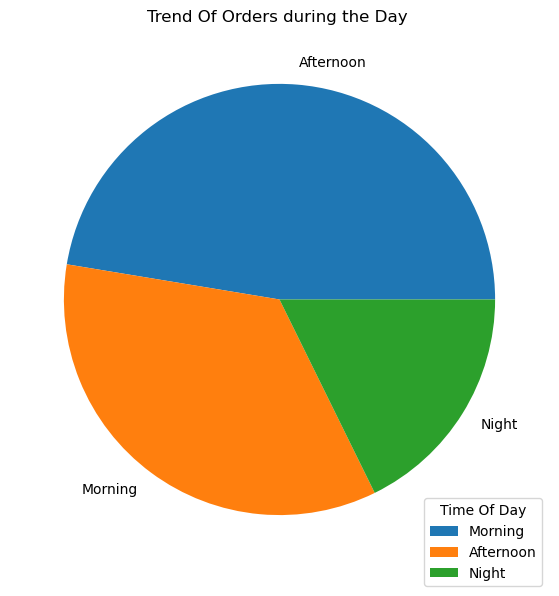

In [ ]:

plt.figure(figsize=(8,7))
df.order_hour_bins.value_counts().plot(kind='pie')
plt.ylabel("")

plt.title("Trend Of Orders during the Day ")
plt.legend(labels, title="Time Of Day", bbox_to_anchor=(1,0.05),loc='center right')
plt.show()

# Bivariate Analysis

In [ ]:
import plotly.express as px

In [ ]:
df.columns

Index(['order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_name', 'aisle', 'department', 'Day', 'order_hour',
       'order_hour_bins'],
      dtype='object')

In [ ]:
dept_time_cpunts = df.groupby(['department','order_hour_bins']).size().reset_index(name='counts')
fig = px.bar(dept_time_cpunts, x='order_hour_bins',y='counts', color='department',title="Department Orders By Hour Of DAY", barmode='group')
fig.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7684\1829233173.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dept_time_cpunts = df.groupby(['department','order_hour_bins']).size().reset_index(name='counts')


# Depart By Time of the Day
### -The sells are mostly high during the afternoon for most products
### -Breakfast and dairy eggs are mostly high during the afternoon this is coz eggs are mainly eaten during breakfast with eggs 
### -Deeper insights into specific products that are bought during the afternoon and also other shrt bins to get an insight on what time excalty the sales will be up.

In [ ]:
dept_day_cpunts = df.groupby(['department','Day']).size().reset_index(name='counts')
fig = px.bar(dept_day_cpunts, x='Day',y='counts', title="Department Orders by day",color='department', barmode='group')
fig.show()

# Departments Order By Day
### -Sunday is the day with more orders and the Produce depart has more orders on Sunday, followed by Monday 
### -Alchol has the highest orders on friday with 27.429k orders compared to other departs 

In [ ]:
df.columns

Index(['order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
       'order_dow', 'order_hour_of_day', 'days_since_prior_order',
       'product_name', 'aisle', 'department', 'Day', 'order_hour',
       'order_hour_bins'],
      dtype='object')

In [ ]:
# Filter produce department
df_prod = df[df['department'] == 'produce']

# Groupby Day and order_hour_of_day
prod_day_hour = df_prod.groupby(['Day', 'order_hour_of_day']).size().reset_index(name='counts')

# Get top 5 hours for each day
top_hours = prod_day_hour.groupby('Day').apply(lambda x: x.nlargest(5, 'counts')).reset_index(drop=True)

# Plot
fig = px.bar(top_hours, x='order_hour_of_day', y='counts', 
             color='Day', title='Produce Department: Top 5 Hours by Day of Week', 
             barmode='group')
fig.show()



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7684\302692332.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:

df_prod = df[(df['department'] == 'produce') & (df['Day'].isin(['Sun', 'Mon']))]


prod_day_hour = df_prod.groupby(['Day', 'order_hour_of_day']).size().reset_index(name='counts')


top_hours = (
    prod_day_hour
    .groupby('Day', group_keys=False)[['order_hour_of_day', 'counts']]
    .apply(lambda x: x.nlargest(5, 'counts'))
    .reset_index(drop=True)
)
top_hours = top_hours.merge(prod_day_hour[['Day', 'order_hour_of_day', 'counts']], 
                            on=['order_hour_of_day', 'counts'], how='left')


fig = px.bar(top_hours, x='order_hour_of_day', y='counts', 
             color='Day', title='Produce Department (Sun & Mon): Top 5 Hours by Day', 
             barmode='group')




In [ ]:
fig.show()

In [ ]:

df_prod = df[(df['department'] == 'produce') & (df['Day'].isin(['Sun', 'Mon']))]


prod_top_products = (
    df_prod.groupby(['Day', 'product_name'])
    .size()
    .reset_index(name='counts')
)


top_products = (
    prod_top_products
    .groupby('Day', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'counts'))
    .reset_index(drop=True)
)


import plotly.express as px

fig = px.bar(top_products, x='product_name', y='counts', color='Day',
             title='Top 5 Produce Products by Day (Sun & Mon)', barmode='group')
fig.show()




C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7684\1518051352.py:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [ ]:
import plotly.graph_objects as go

table_data = df[['order_id', 'add_to_cart_order', 'reordered', 'user_id', 'order_number',
                 'order_dow', 'order_hour_of_day', 'days_since_prior_order',
                 'product_name', 'aisle', 'department', 'Day', 'order_hour',
                 'order_hour_bins']].head(10000).astype(str)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(table_data.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[table_data[col] for col in table_data.columns],
               fill_color='white',
               align='left'))
])

fig.update_layout(title='Orders Table - First 10,000 Rows')
fig.show()


